In [75]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
fetch_housing_data()    

In [76]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)


In [77]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [78]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


"total_bedrooms" feature seem to have some missing values
<br>
all the attributes are numbers except "ocean_proximity" which seems to be categorical

In [79]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


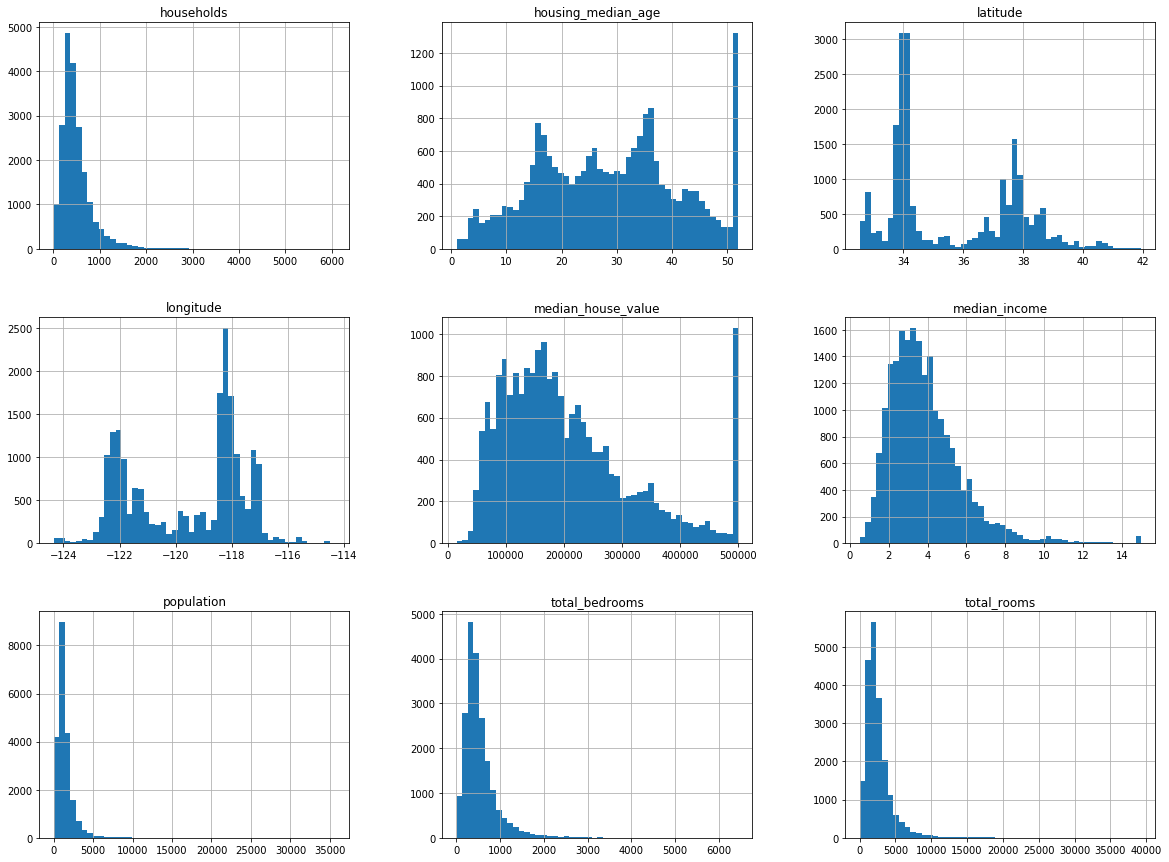

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins = 50, figsize = (20,15))
plt.show()

In [81]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [82]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]



In [83]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

Let's take a closer look to the income_cat

In [84]:
housing["income_cat"] = pd.cut(housing["median_income"],
                              bins = [0., 1.5, 3.0, 4.5, 6., np.inf],
                              labels = [1, 2, 3, 4, 5])

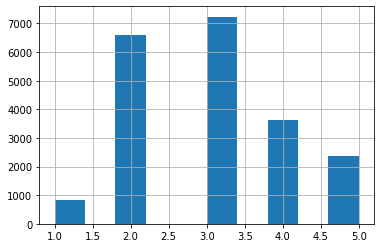

In [85]:
housing["income_cat"].hist()

In [86]:
from sklearn.model_selection import StratifiedShuffleSplit 

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing,  housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [87]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

Removing the income category to make sure the data is back to the previous state


In [88]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis = 1, inplace = True)

### Visualizing the geographical data

In [89]:
housing = strat_train_set.copy()

Let's try to see how's the houses distribution in Cal

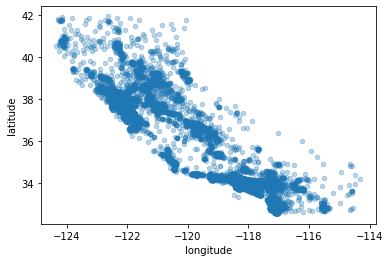

In [90]:
housing.plot(kind="scatter", x = "longitude", y = "latitude", alpha = 0.3)

Above, the distribution shows that tha bay area, LA, San Diego, Central Valley and Fresno seem to be the areas with the highest density

Let's try and get more information about the houses by adding the prices and see how they vary based on the area

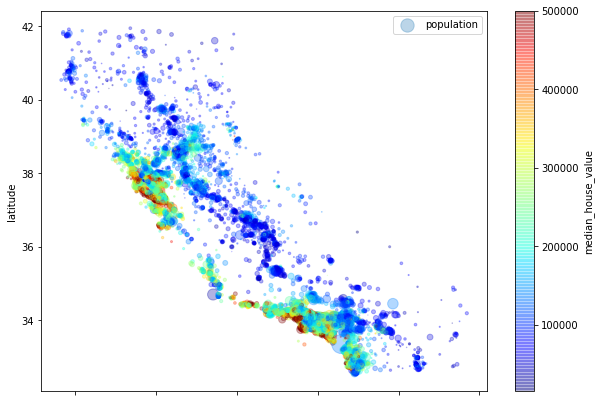

In [91]:
housing.plot(kind="scatter", x = "longitude", y = "latitude", alpha = 0.3, 
            s = housing["population"]/100, label = "population", figsize = (10,7),
            c = "median_house_value", cmap = plt.get_cmap("jet"), colorbar = True)
plt.legend()

### Analyzing the correlation

In [92]:
corr_matrix = housing.corr()

In [93]:
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

The median income seem to be positively correlated with the house value
<br>
It is also worth noting that the latitude is slightly negatively correlated with the house value, this makes sense since naturally the house pricess tend to be cheaper when we move north

Let us now explore the correlation between the top attributes by plotting them against eachother

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028288969DA0>,
      dtype=object)

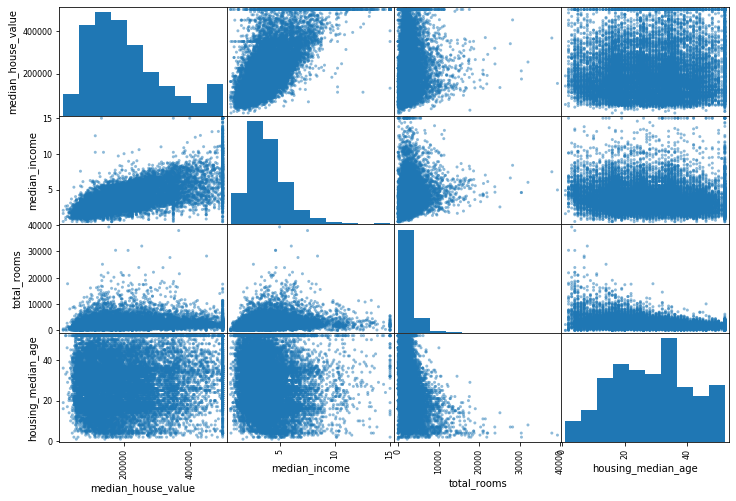

In [94]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize = (12,8))

Let's take a closer look to the correlation between median income and the houses value

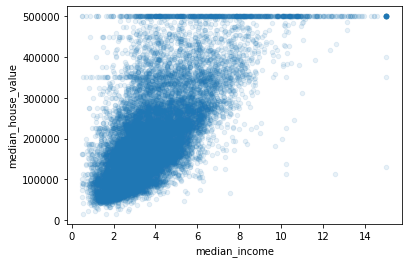

In [95]:
housing.plot(kind = "scatter", x = "median_income", y = "median_house_value", alpha = 0.1)

### Adding extra features to the dataset

In [96]:
housing["room_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedroom_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["popul_per_household"] = housing["population"] / housing["households"]

In [97]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value     1.000000
median_income          0.687160
room_per_household     0.146285
total_rooms            0.135097
housing_median_age     0.114110
households             0.064506
total_bedrooms         0.047689
popul_per_household   -0.021985
population            -0.026920
longitude             -0.047432
latitude              -0.142724
bedroom_per_room      -0.259984
Name: median_house_value, dtype: float64

"bedroom_per_room" is correlated with the price, this shows how creating new features from existing ones can be helpful to our algorithms 

In [98]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

now that we seperated our label and features, let's go ahead and clean our training data

### Data cleaning and missing values imputation

In [99]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

housing_num = housing.drop("ocean_proximity", axis=1)

imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [100]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [101]:
X = imputer.transform(housing_num)

Now for the remaining categorical variable we will use one-hot-encoding to transform it into numbers

In [103]:
housing_cat = housing[["ocean_proximity"]]

In [104]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

Creating a custom transformer

In [108]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder (BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y= None):
        return self
    def transform(self, X, y= None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

Let's now create a pipeline to transform and scale our features

In [109]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = "median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [110]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
("num", num_pipeline, num_attribs),
("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

Now that we have transfromed our data let's jump into the machine learning part

In [112]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now that our model is fit to our training data we can start doing some predictions

In [114]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
    

In [115]:
lin_rmse

68628.19819848923

This is not a very good model so let's go and try decision trees

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

In [120]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

This is clearly overfitting the data

In [121]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
tree_rmse_scores = np.sqrt(-scores)

Let's take a look at our scores

In [123]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())
    
display_scores(tree_rmse_scores)

Scores: [68937.21300721 67403.22656323 70897.34248764 68340.3232984
 71580.18778198 75105.48422501 71270.86586439 71649.30467811
 78862.47890069 69411.53578552]
Mean: 71345.79625921755
Standard Deviation: 3242.050493378578


Let's try cross validation with regression as well

In [126]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
lin_rmse_scores = np.sqrt(-lin_scores)

In [127]:
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard Deviation: 2731.674001798349


Actually, regression ended up being a better model that decision tree, but let's go ahead and try an ensemble model, we will try one of my favorite ml algorithms and that is the almighty Random Forest regressor

In [128]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [130]:
rfr_scores = cross_val_score(rfr, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
rfr_rmse_scores = np.sqrt(-rfr_scores)

In [131]:
display_scores(rfr_rmse_scores)

Scores: [49664.56779186 47267.64668798 49637.6984846  52218.54727512
 49630.3644732  53356.11039149 49093.56908227 48276.34097672
 53252.78417573 50407.04941502]
Mean: 50280.46787539704
Standard Deviation: 1943.807614876666


Random Forest seem to be working much better than the previous models, we can now focus on fine tuning this model by tuning its hyperparams and try to find the best ones 

Let's use GridSearchCV to find our best params for this model

In [133]:
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

rfr = RandomForestRegressor()

grid_search = GridSearchCV(rfr, param_grid, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [134]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [135]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Let's go ahead and try to rank the features from the most important one to the least important feature using a very good option that comes with Random forest called "feature importance"

In [140]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.49014978e-02, 6.59675697e-02, 4.45660358e-02, 1.56209312e-02,
       1.47200271e-02, 1.49750334e-02, 1.51192124e-02, 3.88043758e-01,
       4.50525226e-02, 1.14195114e-01, 5.57836077e-02, 5.65564990e-03,
       1.50141453e-01, 4.06763525e-05, 2.33319782e-03, 2.88371314e-03])

better display of the feature importance 

In [142]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse= True)

[(0.38804375796321594, 'median_income'),
 (0.15014145311471092, 'INLAND'),
 (0.11419511390412766, 'pop_per_hhold'),
 (0.06596756969222081, 'latitude'),
 (0.06490149782351944, 'longitude'),
 (0.055783607738337807, 'bedrooms_per_room'),
 (0.045052522597471875, 'rooms_per_hhold'),
 (0.04456603577175746, 'housing_median_age'),
 (0.015620931232343604, 'total_rooms'),
 (0.015119212424721949, 'households'),
 (0.014975033437286962, 'population'),
 (0.014720027081672651, 'total_bedrooms'),
 (0.005655649903498635, '<1H OCEAN'),
 (0.0028837131396149186, 'NEAR OCEAN'),
 (0.0023331978230022137, 'NEAR BAY'),
 (4.067635249721786e-05, 'ISLAND')]

From this option, we can start dropping some features and measure the performence of our model to see if it improves (or performs worse)
<br>
Now that we have built a pretty good model, we can go ahead and test it to see how it performs on our testing data

In [143]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis= 1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

final_rmse

47940.59409177226

Let's see how confident we are with our model and see if it might perform better than the current model in production

In [145]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                        loc= squared_errors.mean(),
                        scale= stats.sem(squared_errors)))

array([45990.38421889, 49814.51277633])